In [1]:
import pandas as pd
import numpy as np

In [ ]:
# read data from folders
import os

for dirname, _, filenames in os.walk('./Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_normalize = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_normalize = ImageDataGenerator(rescale=1./255)
val_normalize = ImageDataGenerator(rescale=1./255)

In [10]:
train_set = train_normalize.flow_from_directory(directory="./Data/Train",target_size=(225,225),class_mode='categorical')
val_set = val_normalize.flow_from_directory(directory="./Data/Validation",target_size=(225,225),class_mode="categorical")
test_set = test_normalize.flow_from_directory(directory="./Data/Test/Test",target_size=(225,225),class_mode="categorical")

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(225,225,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
plot_model(model,show_layer_names=True,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_set, epochs=9, batch_size=16, validation_data=test_set, callbacks=[early_stopping])

Epoch 1/9


C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.4015 - loss: 2.7787 - val_accuracy: 0.6267 - val_loss: 0.7200
Epoch 2/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.6731 - loss: 0.7476 - val_accuracy: 0.7667 - val_loss: 0.5314
Epoch 3/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.8405 - loss: 0.4071 - val_accuracy: 0.8267 - val_loss: 0.4674
Epoch 4/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.8862 - loss: 0.3871 - val_accuracy: 0.8333 - val_loss: 0.4548
Epoch 5/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.9127 - loss: 0.2840 - val_accuracy: 0.8733 - val_loss: 0.4404
Epoch 6/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.8917 - loss: 0.3473 - val_accuracy: 0.8400 - val_loss: 0.4701
Epoch 7/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.8611 - loss: 0.4549 - val_accuracy: 0.9200 - val_loss: 0.3175
Epoch 8/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 262s 6s/step - accuracy: 0.9291 - loss: 0.2453 - val_accuracy: 0.9000 - val_loss: 0.3463
Ep

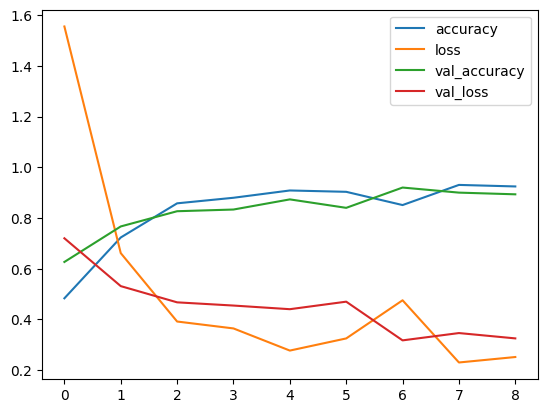

In [23]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [24]:
model.evaluate(val_set)

C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8153 - loss: 0.4703


[0.4535456895828247, 0.8166666626930237]

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

classes =train_set.class_indices
icd={i:j for j,i in classes.items()} 
def output(location):
    img=load_img(location,target_size=(225,225,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    print ('Pridicted Class',icd[classes_x[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Pridicted Class Rust


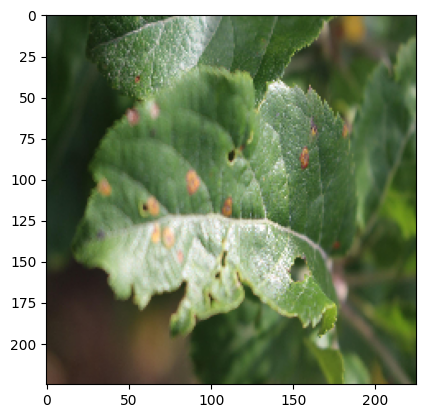

In [27]:
test_img='./Data/Test/Test/Rust/830f26cc6d3cd13e.jpg'
pic=load_img(test_img,target_size=(225,225,3))
plt.imshow(pic)
output(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Pridicted Class Powdery


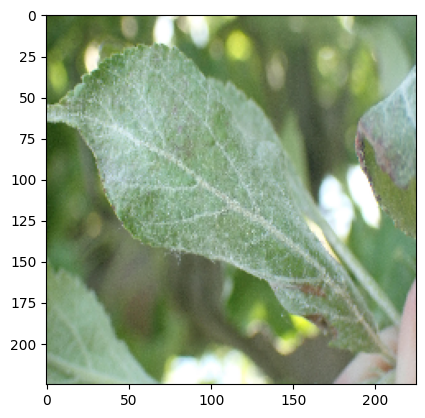

In [28]:
test_img='./Data/Test/Test/Powdery/81c36e378473c93e.jpg'
pic=load_img(test_img,target_size=(225,225,3))
plt.imshow(pic)
output(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Pridicted Class Healthy


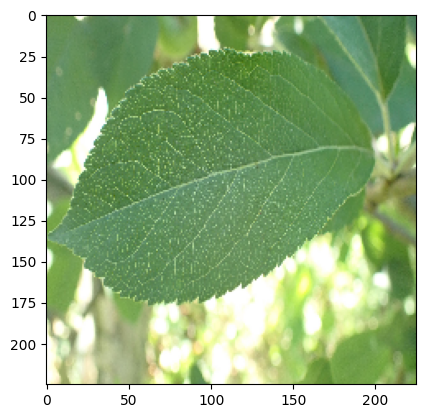

In [29]:
test_img='./Data/Validation/Healthy/9d6acb154f9932c8.jpg'
pic=load_img(test_img,target_size=(225,225,3))
plt.imshow(pic)
output(test_img)